1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [2]:
import pandas as pd

file_path='C:/Users/DELL/PycharmProjects/pythonProject/introduction/open_rank_20236.csv'
data=pd.read_csv(file_path)

top_100_data = data[data['rank']<=100]

max_value=top_100_data['value'].max()
min_value=top_100_data['value'].min()
mean_value=top_100_data['value'].mean()
median_value=top_100_data['value'].median()

print(f"最大值: {max_value}")
print(f"最小值: {min_value}")
print(f"均值: {mean_value}")
print(f"中位数: {median_value}")

最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996

2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [27]:
import pandas as pd

file_path='C:/Users/DELL/PycharmProjects/pythonProject/introduction/activity_2022.csv'
data=pd.read_csv(file_path)

top_10_data = data.head(10)
growth_rate=[]
for i,row in top_10_data.iterrows():
    repo_growth_rate=[]
    for j in range(1,len(row)-1):
        prev_value=row.iloc[j]
        curr_value=row.iloc[j+1]
        rate=((curr_value-prev_value)/prev_value)*100
        repo_growth_rate.append(rate)
    
    growth_rate.append(repo_growth_rate)

growth_rate_df=pd.DataFrame(growth_rate,columns=[f'growth_rate_{i+1}' for i in range(len(growth_rate[0]))])
top_10_data_growth=pd.concat([top_10_data,growth_rate_df],axis=1)

top_10_data_growth['average_growth_rate']=top_10_data_growth.iloc[:,-len(growth_rate[0]):].mean(axis=1)
print(top_10_data_growth[['repo','average_growth_rate']])

                                     repo  average_growth_rate
0                MicrosoftDocs/azure-docs            -1.792781
1                           NixOS/nixpkgs             0.029453
2                          dotnet/runtime            -2.284829
3                          elastic/kibana            -0.365071
4  firstcontributions/first-contributions            14.082374
5                         flutter/flutter            -1.240426
6                     home-assistant/core             0.845268
7                        microsoft/vscode             2.290469
8                         pytorch/pytorch             1.316038
9                          rust-lang/rust            -0.377805


In [ ]:
repo  average_growth_rate
0                MicrosoftDocs/azure-docs            -1.792781
1                           NixOS/nixpkgs             0.029453
2                          dotnet/runtime            -2.284829
3                          elastic/kibana            -0.365071
4  firstcontributions/first-contributions            14.082374
5                         flutter/flutter            -1.240426
6                     home-assistant/core             0.845268
7                        microsoft/vscode             2.290469
8                         pytorch/pytorch             1.316038
9                          rust-lang/rust            -0.377805

3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [ ]:
1.排名：中国的 Alibaba 和 Baidu 排名较为靠前，分别位于全球排名的第1位和第2位。
其他如 Ant group、PingCAP 等企业在中国排名靠前，但全球排名相对较低。
2.价值：中国企业的 Alibaba 在价值上具有领先优势，达到约 103368.49，但是全球企业的 Microsoft 和 Google 等企业的价值明显更高。
中国企业的价值普遍低于全球企业，尤其是 Alibaba 相较于全球排名前几的公司，差距较大。
3.排名变化：中国企业中，ByteDance、Fit2Cloud 的排名有显著提升，分别增长了4位和1位。
StarRocks 和 Deepin 的排名大幅下降，分别下降了25位和23位。
4.价值变化：中国企业的 StarRocks 和 ByteDance 在价值增幅上表现显著，分别增加了约 10679.05 和 10627.13。
全球企业的增值幅度普遍较大，尤其是 Microsoft 和 Google 等企业。

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [4]:
P_non_software=0.25 
P_software=0.75 
P_html_non_software=0.85 
P_html_software=0.1

P_html=P_html_non_software*P_non_software+P_html_software*P_software
P_non_software_given_html=(P_html_non_software*P_non_software)/P_html

print(f"该项目是非软件类项目的概率是: {P_non_software_given_html:.4f}")

该项目是非软件类项目的概率是: 0.7391


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [5]:
P_tool_component=0.5
P_non_tool_component=0.5
P_js_tool_component=0.35
P_js_non_tool_component=0.1

P_js=P_js_tool_component*P_tool_component+P_js_non_tool_component*P_non_tool_component
P_tool_component_given_js=(P_js_tool_component * P_tool_component)/P_js

print(f"该项目是工具组件型项目的概率是: {P_tool_component_given_js:.4f}")

该项目是工具组件型项目的概率是: 0.7778


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

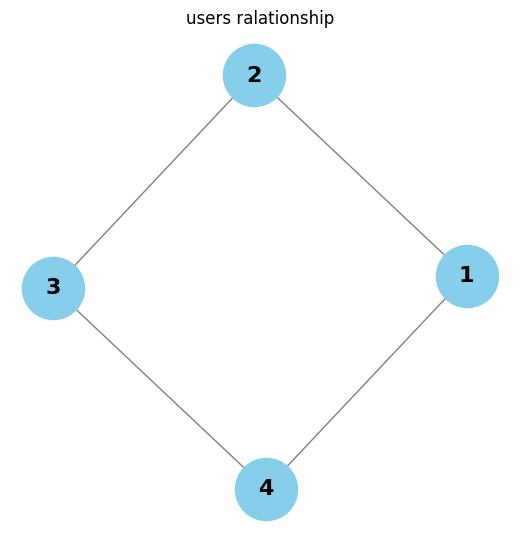

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
user=[1,2,3,4] 
edge=[(1,2),(2,3),(3,4),(4,1)]

G=nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edge)

plt.figure(figsize=(5,5)) 
nx.draw(G,with_labels=True,node_size=2000,node_color='skyblue',font_size=16,font_weight='bold',edge_color='gray')

plt.title("users ralationship")
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

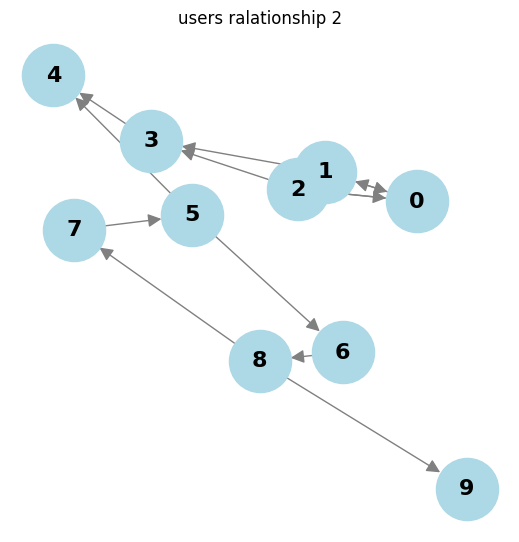

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
users=[0,1,2,3,4,5,6,7,8,9]
edges=[(0,1),(1,0),(0,2),(2,0),(1,2),(2,1),(1,3),(2,3),(3,4),(5,4),(5,6),(7,5),(6,8),(8,7),(8,9)]

G=nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

plt.figure(figsize=(5,5))
nx.draw(G,with_labels=True,node_size=2000,node_color='lightblue',font_size=16,font_weight='bold',edge_color='gray',arrowsize=20)

plt.title("users ralationship 2")
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

PageRank values:
Node 0: 0.0950
Node 1: 0.1055
Node 2: 0.1055
Node 3: 0.0950
Node 4: 0.1593
Node 5: 0.1020
Node 6: 0.0786
Node 7: 0.0786
Node 8: 0.1020
Node 9: 0.0786


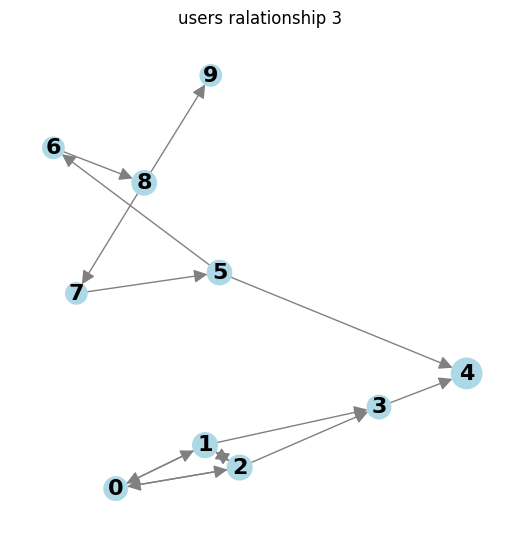

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
users=[0,1,2,3,4,5,6,7,8,9]
edges=[(0,1),(1,0),(0,2),(2,0),(1,2),(2,1),(1,3),(2,3),(3,4),(5,4),(5,6),(7,5),(6,8),(8,7),(8,9)]

G=nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

pagerank_values=nx.pagerank(G)

print("PageRank values:")
for node, pr in pagerank_values.items():
    print(f"Node {node}: {pr:.4f}")

node_sizes=[pagerank_values[node]*3000 for node in G.nodes()]

plt.figure(figsize=(5,5))
nx.draw(G,with_labels=True,node_size=node_sizes,node_color='lightblue',font_size=16,font_weight='bold',edge_color='gray',arrowsize=20)
plt.title("users ralationship 3")
plt.show()